#Dataset Preparation

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/datafm20.csv"
dataset = pd.read_csv(path)

In [ ]:
for i in range(len(dataset)):
  dataset['Name'][i] = dataset['Name'][i].encode('ascii', 'ignore').decode()
  dataset['Division'][i] = dataset['Division'][i].encode('ascii', 'ignore').decode()  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
dataset

,Unnamed: 0,Name,Position,Club,Division,Based,Nation,Height,Weight,Age,Preferred Foot,Best Pos,Best Role,Value,Wage,CA,PA,Wor,Vis,Thr,Tec,Tea,Tck,Str,Sta,TRO,Ref,Pun,Pos,Pen,Pas,Pac,1v1,OtB,Nat,Mar,L Th,Lon,Ldr,Kic,Jum,Hea,Han,Fre,Fla,Fir,Fin,Ecc,Dri,Det,Dec,Cro,Cor,Cnt,Cmp,Com,Cmd,Bra,Bal,Ant,Agi,Agg,Aer,Acc
0,0,Lionel Messi,"AM (RC), ST (C)",Barcelona,Spanish First Division,Spain (First Division),ARG,170,72,32,Left,AM (R),IF,73000000,1200000,195,200,7,20,2,20,14,7,9,13,3,1,2,5,17,20,15,2,16,14,4,4,17,14,1,6,10,2,19,20,19,20,2,20,20,20,15,15,13,18,2,2,10,19,19,19,7,2,18
1,1,Cristiano Ronaldo,"AM (RL), ST (C)",Juventus,Italian Serie A,Italy (Serie A),POR,185,83,34,Either,ST (C),CF,31000000,950000,195,196,10,14,2,17,10,8,16,15,3,2,2,6,20,15,16,2,18,20,4,3,19,17,3,17,19,3,15,18,17,19,1,15,20,18,15,13,16,14,4,1,16,14,18,13,6,2,15
2,2,Kylian Mbapp,"AM (RL), ST (C)",Paris SG,Ligue 1 Conforama,France (Ligue 1 Conforama),FRA,178,73,20,Right,ST (C),AF,86000000,375000,181,196,10,13,1,17,10,2,11,14,2,1,1,2,15,13,20,3,18,15,2,2,12,10,4,8,7,3,10,18,16,17,3,18,14,16,13,10,13,18,2,1,12,14,17,16,6,4,20
3,3,Manuel Neuer,GK,FC Bayern,Bundesliga,Germany (Bundesliga),GER,192,90,33,Either,GK,SK,44000000,250000,176,193,14,12,19,12,18,3,16,10,20,14,8,15,10,13,10,15,1,13,3,3,3,13,18,15,10,14,13,6,13,3,18,3,18,16,2,10,15,20,12,17,14,14,19,15,8,14,13
4,4,Neymar,"M (L), AM (LC), ST (C)",Paris SG,Ligue 1 Conforama,France (Ligue 1 Conforama),BRA,175,68,27,Right,AM (L),IW,91000000,600000,186,190,10,16,1,20,8,1,10,13,1,4,2,2,17,16,16,1,18,14,1,2,15,14,2,6,8,2,17,20,18,16,1,20,16,15,16,16,10,17,3,1,14,14,16,18,10,4,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144745,144745,Yuan Jinxing,ST (C),Unknown,Unknown,China,CHN,169,81,41,Right Only,ST (C),P,0,0,3,3,3,1,4,6,2,1,1,6,2,2,1,1,2,1,9,3,12,13,1,1,2,4,1,5,4,3,1,8,10,7,3,6,7,5,1,2,3,7,3,3,2,3,9,8,8,1,11
144746,144746,Aizudin Abdul Rahman,M (C),BSRC,Bruneian Premier League,Brunei (Premier League),BRU,180,69,24,Right Only,M (C),CM,0,0,2,2,9,4,3,5,5,4,3,5,1,3,1,6,1,10,12,3,4,12,6,1,3,14,3,9,1,1,2,1,7,3,1,1,9,10,1,2,2,4,1,3,1,3,4,9,14,2,9
144747,144747,Berlin Jean-Gilles,ST (C),CS Monteuil,Premire Ligue de soccer du Qubec,Canada (PLSQ),HAI,180,79,32,Right Only,ST (C),P,300,6,2,2,2,1,3,1,1,1,2,7,2,2,3,1,6,1,9,3,8,14,1,1,1,13,2,5,10,3,1,4,5,11,2,1,6,6,1,1,1,8,3,1,1,2,4,10,6,3,11
144748,144748,Frederik van Hauen,M (C),Skovshoved,2. Division,Denmark (2. Division),DEN,195,85,19,Right Only,M (C),CM,0,0,1,2,8,7,2,8,6,4,6,4,3,3,3,4,1,3,1,1,6,13,4,1,5,9,1,13,3,3,2,2,10,2,2,4,12,13,3,3,4,3,3,3,3,4,4,3,16,1,5


#Descriptive Statistics

In this section we will learn about Descriptive Statistics using the datasets given above. The dataset was obtained from the Football Manager 2020 database. In Descriptive Statistics we will learn about:


1. Type of Data and Measurement Level
2. Data Visualization
 * Categorical Variables - Bar Chart
 * Numerical Variables - Histogram Chart
 * 2 Variables - Scatter Plot
3. Measurement of Central Tendency (Mean, Median, Mode)
4. Skewness
5. Variance, Standard Deviation, and Coefficient of Variation
6. Covariance and Correlation Coefficient








##1. Type of Data and Measurement Level

**Types of Data**
* Categorical data, represented by groups or categories. (e.g. Club, Division,Based, Nation, Preferred Foot, Best Pos, Best Role) 
* Numerical data, represented by number. Divided into two types; Discrete and Continous.
  * Discrete data; counted in a finite matter (e.g. CA, PA, 47 Attributes)
  * Continous data; infinite and impossible to count (e.g. Height, Weight, Age, Value, Wage)

**Measurement Level**
* Qualitative, divided into two types; Nominal and Ordinal
  * Nominal; categories that cannot be put in any order (e.g. Club, Division, Based, Nation, Preferred Foot, Best Pos, Best Role)
  * Ordinal; categories (may also represented by number) that can be ordered (e.g. CA, PA, 47 Attributes)
* Quantitative, divided into two types; Interval and Ratio.
  * Interval; don't have a true zero
  * Ratio; have a true zero (e.g. Height, Weight, Age, Value, Wage)

Example of Categorical Data

In [ ]:
# Club
pd.DataFrame(dataset['Club'].unique())

Example of Numerical Data

In [ ]:
# Current Ability
pd.DataFrame(dataset['CA'])

In [ ]:
# Height
pd.DataFrame(dataset['Height'])

##2. Data Visualization

**Categorical Variables - Bar Chart**

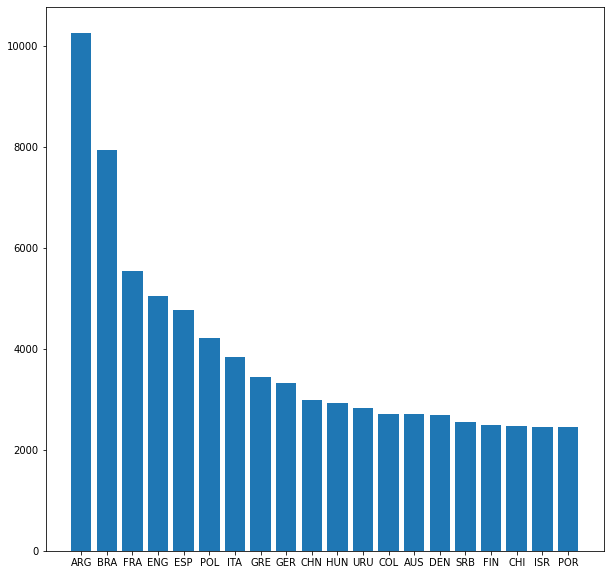

In [ ]:
nation_freq = pd.DataFrame(dataset.groupby('Nation')['Name'].count().reset_index().sort_values('Name', ascending=False).head(20))

plt.figure(figsize=[10,10])
plt.bar(nation_freq['Nation'],nation_freq['Name'])
plt.show()

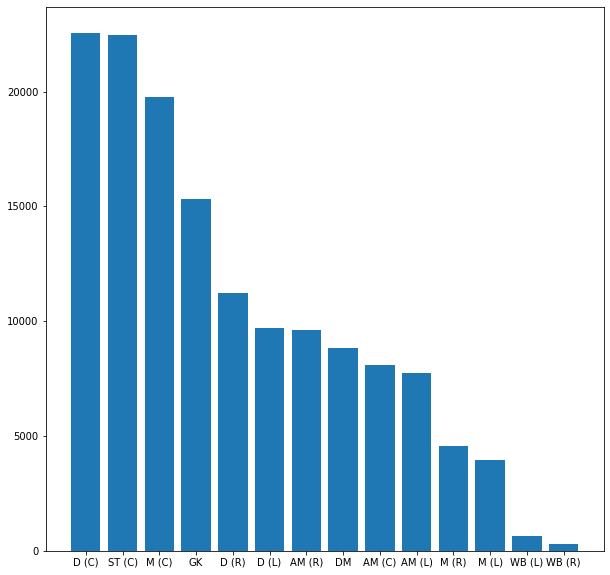

In [ ]:
bestpos_freq = pd.DataFrame(dataset.groupby('Best Pos')['Name'].count().reset_index().sort_values('Name', ascending=False))

plt.figure(figsize=[10,10])
plt.bar(bestpos_freq['Best Pos'],bestpos_freq['Name'])
plt.show()

**Numerical Variables - Histogram Charts**

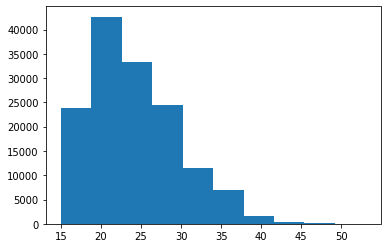

In [ ]:
plt.hist(dataset['Age'], range=(15,53))
plt.show()

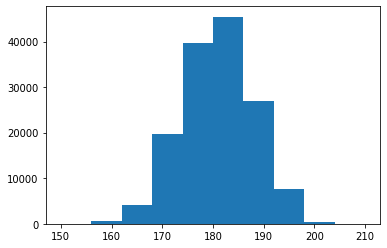

In [ ]:
plt.hist(dataset['Height'], range=(150,210))
plt.show()

**Numerical Variables - Boxplot**

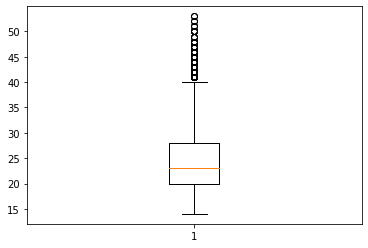

In [ ]:
plt.boxplot(dataset['Age'])
plt.show()

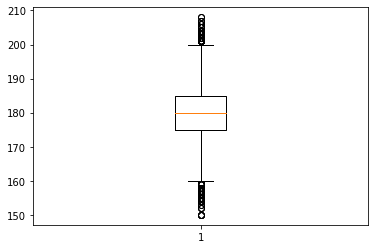

In [ ]:
plt.boxplot(dataset['Height'])
plt.show()

**2 Variables - Scatter Plot**

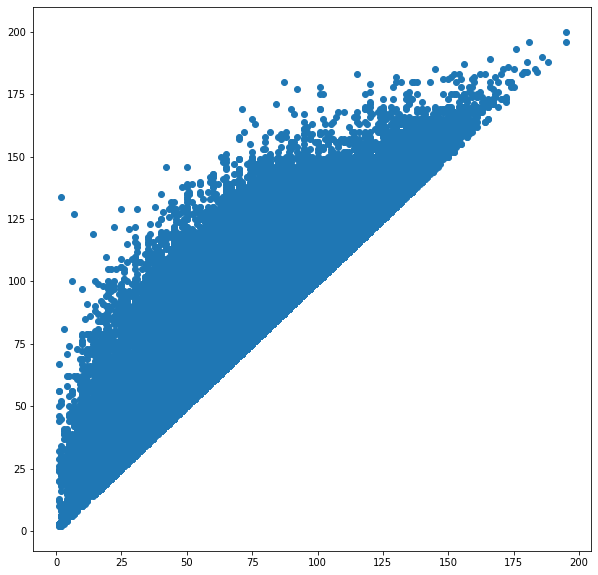

In [ ]:
plt.figure(figsize=[10,10])
plt.scatter(dataset['CA'], dataset['PA'])
plt.show()

##3. Mean, Median, and Mode

If an analyst wants to know where the center, or other location, of the data is, then they can use a measure of central tendency. There are several methods to obtain a measure of central tendency, at least the mean, median and mode. However, its use must be adjusted to the context of the data it has. Because each has its advantages and disadvantages. 

* Mean
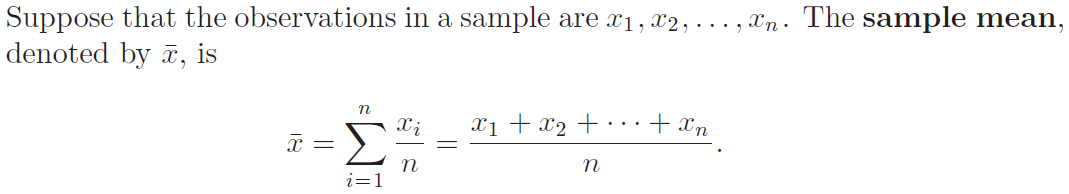

  * Advantages; Takes all values to calculate the average.
  * Disadvantages; influenced by extreme values or outliers.
* Median
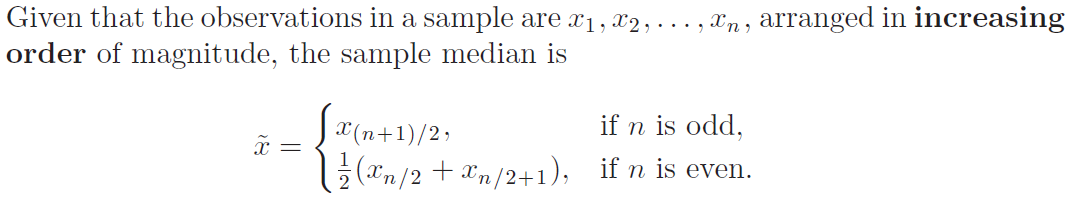
  * Advantages; not affected by very large or very small values.
  * Disadvantages; caused by ordering dataset, it is time-consuming in the case of a large number of observations.
* Mode
  * Advantages;  can be used if the data set is not in numbers.
  * Disadvantages; if there is more than one mode or no mode.

In [ ]:
parameter = 'Age'
mean = dataset[parameter].mean()
median = dataset[parameter].median()
mode = dataset[parameter].mode()

print("Mean: ", mean)
print("Median: ", median)
print("Mode: ", mode[0])

Mean:  24.04626597582038
Median:  23.0
Mode:  19


##4. Skewness

A distribution is said to be symmetric if it can be folded along a vertical axis
so that the two sides coincide. A distribution that lacks symmetry with respect to a vertical axis is said to be skewed.

* Skewed Positive; Mean > Median > Mode (img a)
* Symmetric; Mean = Median = Mode (img b)
* Skewed Negative; Mean < Median < Mode (img c)

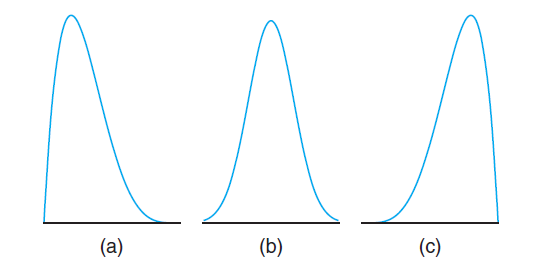

Example:

Mean:  24.04626597582038
Median:  23.0
Mode:  19


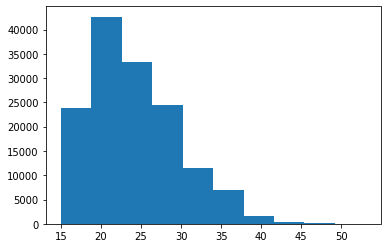

In [ ]:
#Skewed Positive

parameter = 'Age'
mean = dataset[parameter].mean()
median = dataset[parameter].median()
mode = dataset[parameter].mode()

print("Mean: ", mean)
print("Median: ", median)
print("Mode: ", mode[0])

plt.hist(dataset[parameter], range=(15,53))
plt.show()

Mean:  9.228186528497409
Median:  10.0
Mode:  12


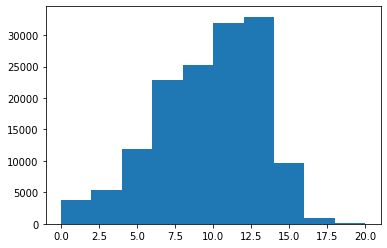

In [ ]:
#Skewed Negative

parameter = 'Sta'
mean = dataset[parameter].mean()
median = dataset[parameter].median()
mode = dataset[parameter].mode()

print("Mean: ", mean)
print("Median: ", median)
print("Mode: ", mode[0])

plt.hist(dataset[parameter], range=(0,20))
plt.show()

Mean:  8.299730569948187
Median:  8.0
Mode:  8


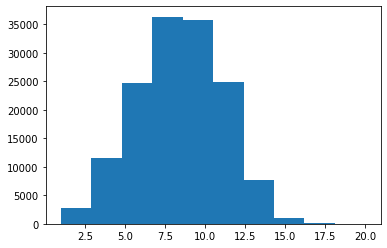

In [ ]:
#Symmetric

parameter = 'Cmp'
mean = dataset[parameter].mean()
median = dataset[parameter].median()
mode = dataset[parameter].mode()

print("Mean: ", mean)
print("Median: ", median)
print("Mode: ", mode[0])

plt.hist(dataset[parameter])
plt.show()

##5. Variance, Standard Deviation, and Coefficient of Variation

Measures of location in a sample do not provide a proper summary of the nature of a data set. We also need information about the spread and variability of the data. Just as there are many measures of central tendency or location, there are many measures of spread or variability. Perhaps the simplest one is the sample range, Xmax −Xmin. In addition, we will know a lot about variance, standard deviation and coefficient of variation.

* Variance

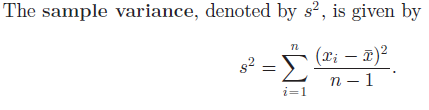

* Standard Deviation

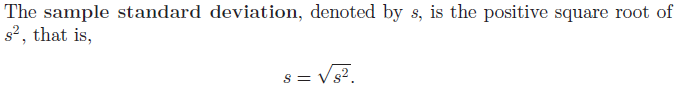

* Coefficient of Variation
  * Standard deviation relative to the mean
  * to compare two or more datasets

In [ ]:
parameter = 'Height'
mean = dataset[parameter].mean()
var = dataset[parameter].var()
std = dataset[parameter].std()
coef_var = std/mean

print("Mean: ", mean)
print("Variance: ", var)
print("Standard Deviation: ", std)
print("Coefficient of Variance: ", coef_var)

Mean:  180.3523385146805
Variance:  49.78979739695739
Standard Deviation:  7.056188588533996
Coefficient of Variance:  0.03912446407208427


In [ ]:
attr = []
for i in range(17,63):
  temp = dataset[dataset.columns[i]].iloc[0]
  attr.append(temp)

mean = pd.DataFrame(attr).mean()
var = pd.DataFrame(attr).var()
std = pd.DataFrame(attr).std()
coef_var = std/mean

print("Mean: ", mean[0])
print("Variance: ", var[0])
print("Standard Deviation: ", std[0])
print("Coefficient of Variance: ", coef_var[0])

Mean:  11.434782608695652
Variance:  51.406763285024134
Standard Deviation:  7.169850994617959
Coefficient of Variance:  0.6270211896433956


##6. Covariance and Correlation Coefficient 

The **covariance** between two random variables is a measure of the nature of the association between the two. If large values of X often result in large values of Y or small values of X result in small values of Y , positive X−μX will often result in positive Y −μY and negative X−μX will often result in negative Y −μY . Thus, the product (X −μX )(Y −μY ) will tend to be positive. On the other hand, if large X values often result in small Y values, the product (X−μX )(Y −μY ) will tend to be negative. The sign of the covariance indicates whether the relationship between two dependent random variables is positive or negative. When X and Y are statistically independent, it can be shown that the covariance is zero.

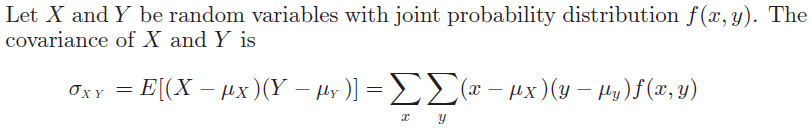

There is a scale-free version of the covariance called the **correlation coefficient** that is used widely in statistics.

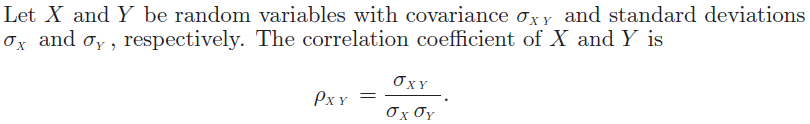

In [ ]:
#Covariance
dataset[dataset.columns[15:63]].cov()

,CA,PA,Wor,Vis,Thr,Tec,Tea,Tck,Str,Sta,TRO,Ref,Pun,Pos,Pen,Pas,Pac,1v1,OtB,Nat,Mar,L Th,Lon,Ldr,Kic,Jum,Hea,Han,Fre,Fla,Fir,Fin,Ecc,Dri,Det,Dec,Cro,Cor,Cnt,Cmp,Com,Cmd,Bra,Bal,Ant,Agi,Agg,Aer
CA,620.704956,536.465354,43.480026,44.793519,4.113928,45.922644,53.240978,30.080438,55.133301,47.657106,-0.593133,0.141408,-0.807960,36.750302,48.936392,43.820704,13.696934,3.685038,44.446963,5.854745,28.493535,37.902083,43.733302,20.208427,2.005741,28.147954,37.634291,-0.162566,43.427142,40.122570,36.215667,35.220591,2.288545,45.540613,19.008450,17.766498,44.750956,38.863359,46.643793,46.702932,2.634680,1.807608,47.206001,54.308574,46.664478,16.448363,11.566633,0.733666
PA,536.465354,627.603418,36.539256,40.875107,3.756518,42.574618,45.478358,26.790239,45.334077,36.610359,-0.319305,0.487848,-0.650336,30.324305,42.494070,40.476631,11.014850,3.476452,37.623501,5.234153,23.586589,31.686015,39.165979,12.873760,2.108692,23.765257,33.035098,0.166775,38.307477,36.607124,33.968910,31.670292,1.911792,41.337989,18.185542,16.259940,39.268755,34.475825,38.805112,39.429935,2.171510,1.625939,41.747823,46.071729,39.102107,13.220848,9.608261,0.618630
Wor,43.480026,36.539256,9.010139,5.797803,-1.210392,5.977414,6.776912,4.839190,4.689909,6.440617,-2.162089,-2.813792,-2.155864,2.570797,4.595527,4.952747,1.005967,-1.493900,5.084433,0.537321,3.966563,4.492181,5.749722,1.918729,-1.963388,1.300452,2.997156,-2.706376,3.803327,4.153285,5.076833,3.336663,-0.469277,4.755128,2.190050,0.235592,5.762020,4.084454,3.542027,4.277444,-1.575986,-1.868606,3.289133,5.202834,3.414553,0.800378,1.874998,-2.367992
Vis,44.793519,40.875107,5.797803,10.252804,-0.697333,7.336989,5.764041,2.383502,3.402338,4.740610,-1.389780,-1.768809,-1.387830,1.359042,5.414564,6.438698,0.919452,-0.897351,5.683755,0.060946,1.640095,3.483765,6.918481,1.380364,-1.165900,0.382214,0.933182,-1.683999,5.611323,6.053977,6.038258,4.637051,-0.301501,5.939447,1.387645,0.771656,6.209883,5.270474,3.228980,4.578009,-0.955776,-1.137992,2.235952,4.589023,3.198218,1.176505,0.521223,-1.464338
Thr,4.113928,3.756518,-1.210392,-0.697333,4.979579,-2.381481,-0.023757,-3.304741,0.536136,-1.710124,4.249552,5.575697,4.192044,0.978213,-1.575768,-0.225836,-0.897423,4.325926,-3.209246,0.005955,-3.099491,-1.433492,-2.674025,0.209303,4.574719,1.744993,-3.104083,5.190768,0.544867,-2.283060,-2.872646,-2.833201,2.004225,-3.243258,0.127395,0.446278,-2.769037,-1.220537,0.919440,-0.297710,4.093770,4.315207,1.969858,0.121654,0.193366,-0.094116,-0.603553,4.989014
Tec,45.922644,42.574618,5.977414,7.336989,-2.381481,12.010458,5.100151,2.069971,2.912837,5.864502,-3.531802,-4.620485,-3.532754,-0.404586,6.339832,6.029397,1.905103,-2.803023,8.541846,0.164224,1.662063,3.899550,7.905726,0.899812,-3.394527,-0.929143,3.391788,-4.388923,5.329753,9.846048,9.136138,7.809746,-1.027979,9.706002,1.238639,-0.229206,8.210118,6.188801,2.073259,5.297569,-2.850652,-3.236241,0.229020,4.399174,3.194181,1.799938,0.464298,-3.973978
Tea,53.240978,45.478358,6.776912,5.764041,-0.023757,5.100151,9.073029,4.621508,6.560524,5.898249,-0.656495,-0.832716,-0.662515,4.087866,5.830310,5.084822,0.288316,-0.133390,4.529316,0.390194,3.847954,5.486928,5.290174,2.651446,-0.436173,3.066297,3.502191,-0.838516,4.778501,3.853269,3.700145,2.931433,0.097493,4.468484,2.416858,0.730047,5.627328,4.355634,5.454412,5.183983,-0.247108,-0.411276,5.830311,6.575263,4.653637,0.438172,1.721794,-0.639186
Tck,30.080438,26.790239,4.839190,2.383502,-3.304741,2.069971,4.621508,16.313248,4.183061,4.845284,-4.188344,-5.513783,-4.146125,6.886628,1.509279,2.828548,0.584832,-3.773465,1.039697,0.491523,11.870496,5.452254,3.511331,2.244376,-4.237197,1.866314,6.186895,-5.162073,-0.494544,-3.870116,2.585127,-1.882639,-1.601245,-0.487013,1.319248,2.412908,3.106182,1.585167,3.781067,1.667676,-3.688706,-4.019088,3.417365,4.029818,3.166330,0.010018,2.970273,-4.819174
Str,55.133301,45.334077,4.689909,3.402338,0.536136,2.912837,6.560524,4.183061,12.601684,5.854984,-0.066169,-0.105674,-0.069455,5.134449,5.829670

In [ ]:
#Correlation Coefficient
dataset[dataset.columns[15:63]].corr()

,CA,PA,Wor,Vis,Thr,Tec,Tea,Tck,Str,Sta,TRO,Ref,Pun,Pos,Pen,Pas,Pac,1v1,OtB,Nat,Mar,L Th,Lon,Ldr,Kic,Jum,Hea,Han,Fre,Fla,Fir,Fin,Ecc,Dri,Det,Dec,Cro,Cor,Cnt,Cmp,Com,Cmd,Bra,Bal,Ant,Agi,Agg,Aer
CA,1.000000,0.859521,0.581409,0.561502,0.073998,0.531869,0.709459,0.298931,0.623386,0.567241,-0.009060,0.001791,-0.012333,0.475408,0.543884,0.601253,0.269658,0.060882,0.492931,0.079361,0.317486,0.479528,0.521084,0.223545,0.030932,0.330086,0.395560,-0.002178,0.560957,0.349731,0.430831,0.379396,0.048916,0.458322,0.184661,0.290213,0.486116,0.524601,0.663173,0.662044,0.045140,0.029239,0.555406,0.723519,0.687894,0.302087,0.140309,0.010254
PA,0.859521,1.000000,0.485905,0.509560,0.067196,0.490375,0.602679,0.264767,0.509762,0.433355,-0.004851,0.006144,-0.009872,0.390118,0.469681,0.552309,0.215659,0.057120,0.414957,0.070558,0.261362,0.398674,0.464093,0.141624,0.032341,0.277155,0.345306,0.002223,0.492098,0.317330,0.401876,0.339272,0.040638,0.413734,0.175693,0.264140,0.424214,0.462811,0.548684,0.555864,0.036999,0.026156,0.488480,0.610402,0.573239,0.241473,0.115911,0.008599
Wor,0.581409,0.485905,1.000000,0.603221,-0.180702,0.574603,0.749532,0.399150,0.440133,0.636274,-0.274119,-0.295734,-0.273137,0.276026,0.423923,0.564028,0.164380,-0.204856,0.468019,0.060452,0.366834,0.471721,0.568617,0.176166,-0.251316,0.126576,0.261466,-0.301014,0.407764,0.300479,0.501279,0.298322,-0.083253,0.397201,0.176587,0.031941,0.519505,0.457614,0.417986,0.503273,-0.224110,-0.250876,0.321197,0.575306,0.417778,0.122006,0.188781,-0.274695
Vis,0.561502,0.509560,0.603221,1.000000,-0.097594,0.661175,0.597626,0.184299,0.299324,0.439031,-0.165179,-0.174275,-0.164831,0.136792,0.468230,0.687381,0.140845,-0.115354,0.490457,0.006428,0.142190,0.342942,0.641398,0.118808,-0.139901,0.034875,0.076316,-0.175584,0.563968,0.410589,0.558911,0.388651,-0.050142,0.465092,0.104888,0.098075,0.524859,0.553554,0.357207,0.504941,-0.127412,-0.143227,0.204690,0.475689,0.366830,0.168122,0.049195,-0.159242
Thr,0.073998,0.067196,-0.180702,-0.097594,1.000000,-0.307943,-0.003534,-0.366666,0.067681,-0.227255,0.724732,0.788274,0.714422,0.141281,-0.195530,-0.034595,-0.197257,0.797949,-0.397368,0.000901,-0.385580,-0.202485,-0.355719,0.025850,0.787677,0.228466,-0.364257,0.776604,0.078579,-0.222182,-0.381539,-0.340738,0.478285,-0.364418,0.013817,0.081389,-0.335825,-0.183944,0.145950,-0.047118,0.783071,0.779314,0.258758,0.018095,0.031825,-0.019298,-0.081741,0.778494
Tec,0.531869,0.490375,0.574603,0.661175,-0.307943,1.000000,0.488570,0.147882,0.236768,0.501803,-0.387835,-0.420613,-0.387667,-0.037625,0.506542,0.594723,0.269632,-0.332919,0.681018,0.016003,0.133134,0.354673,0.677174,0.071556,-0.376339,-0.078330,0.256283,-0.422807,0.494923,0.616979,0.781332,0.604778,-0.157958,0.702223,0.086504,-0.026916,0.641136,0.600562,0.211909,0.539861,-0.351106,-0.376329,0.019371,0.421323,0.338499,0.237646,0.040489,-0.399285
Tea,0.709459,0.602679,0.749532,0.597626,-0.003534,0.488570,1.000000,0.379872,0.613547,0.580670,-0.082944,-0.087216,-0.083646,0.437389,0.535961,0.577059,0.046949,-0.018228,0.415473,0.043747,0.354629,0.574178,0.521353,0.242595,-0.055637,0.297414,0.304463,-0.092939,0.510536,0.277806,0.364079,0.261182,0.017236,0.371962,0.194198,0.098635,0.505600,0.486303,0.641427,0.607817,-0.035017,-0.055026,0.567377,0.724538,0.567406,0.066561,0.172754,-0.073890
Tck,0.298931,0.264767,0.399150,0.184299,-0.366666,0.147882,0.379872,1.000000,0.291749,0.355739,-0.394642,-0.430679,-0.390389,0.549521,0.103471,0.239394,0.071022,-0.384558,0.071125,0.041098,0.815867,0.425500,0.258071,0.153144,-0.403077,0.135001,0.401119,-0.426696,-0.039404,-0.208086,0.189699,-0.125094,-0.211118,-0.030233,0.079054,0.243124,0.208131,0.131988,0.331604,0.145823,-0.389832,-0.401019,0.248015,0.331161,0.287915,0.001135,0.222253,-0.415470
Str,0.623386,0.509762,0.440133,0.299324,0.067681,0.236768,0.613547,0.291749,1.000000,0.489095,-0.007094,-0.009391,-0.007441,0.466152,0.454723,0.293580,-0.082869,0.056256,0.285252,0.035595,0.337618,0.420873,0.320626,0.229369,0.015968,

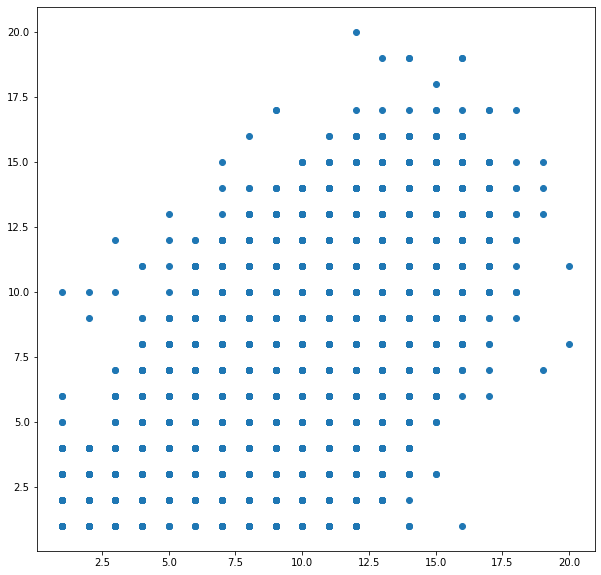

In [ ]:
plt.figure(figsize=[10,10])
plt.scatter(dataset['Ref'], dataset['Thr'])
plt.show()

Reference:
1. Walpole, R. E., Myers, R. H., Myers, S. L.,, Ye, K. (2017). Probability & statistics for engineers and scientists 9th Edition. Pearson Education.
2. The Data Science Course 2022: Complete Data Science Bootcamp (https://www.udemy.com/course/the-data-science-course-complete-data-science-bootcamp/)